# ECMWF Open Data

This demonstrates how to use the ECMWF Real-Time Open Data

> [Media Statement](https://www.ecmwf.int/en/about/media-centre/news/2022/ecmwf-makes-wide-range-data-openly-available)
>
> The data that are becoming available are based on a range of high-resolution forecasts (HRES – 9 km horizontal resolution) and ensemble forecasts (ENS – 18 km horizontal resolution). **They will be made accessible at a resolution of 0.4 x 0.4 degrees**.

This data is freely available from ECMWF in GRIB2 format ([read more 👀](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time)).

There following prodcuts are available:
- `"oper"` - operational high-resolution forecast, atmospheric fields
- `"enfo"` - ensemble forecast, atmospheric fields
- `"wave"` - wave forecasts
- `"waef"` - ensemble forecast, ocean wave fields


In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from herbie import Herbie

from paint.standard2 import cm_tmp, cm_wind, cm_wave_height
from toolbox import EasyMap, pc

In [2]:
H = Herbie("2022-01-26", model="ecmwf", product="oper", fxx=12)

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2022-Jan-26 00:00 UTC F12 ┊ GRIB2 @ local ┊ IDX @ azure


## Unique Index Files

The ECMWF index files are different than the wgrib2-style index files, so pay close attention to how you should select the field you want.

In [3]:
# Show the searchString_help
print(H.searchString_help)


Use regular expression to search for lines in the index file.
Here are some examples you can use for the ecCodes-style `searchString`

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence (all levels)
":gh:"                   geopotential height (all levels)
":gh:500"                geopotential height only at 500 hPa
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity
":r:"                    relative humidity
":ro:" 

In [4]:
# Pay attention to the "search_this" column
H.read_idx()

grib_message  start_byte  end_byte              range reference_time  \
0              1           0    609046           0-609046     2022-01-26   
1              2      609046   1218092     609046-1218092     2022-01-26   
2              3     1218092   1827138    1218092-1827138     2022-01-26   
3              4     1827138   2436184    1827138-2436184     2022-01-26   
4              5     2436184   2842280    2436184-2842280     2022-01-26   
..           ...         ...       ...                ...            ...   
77            78    48114266  48926262  48114266-48926262     2022-01-26   
78            79    48926262  49738258  48926262-49738258     2022-01-26   
79            80    49738258  50550254  49738258-50550254     2022-01-26   
80            81    50550254  51159324  50550254-51159324     2022-01-26   
81            82    51159324  51971320  51159324-51971320     2022-01-26   

            valid_time            step param levelist levtype  number domain  \
0  2022-01-26 12:00:00 0 days 12:00:00   skt      NaN     sfc     NaN      g   
1  2022-01-26 12:00:00 0 days 12:00:00    st      NaN     sfc     NaN      g   
2  2022-01-26 12:00:00 0 days 12:00:00    gh     1000      pl     NaN      g   
3  2022-01-26 12:00:00 0 days 12:00:00    gh      925      pl     NaN      g   
4  2022-01-26 12:00:00 0 days 12:00:00     r      300      pl     NaN      g   
..                 ...             ...   ...      ...     ...     ...    ...   
77 2022-01-26 12:00:00 0 days 12:00:00     d      250      pl     NaN      g   
78 2022-01-26 12:00:00 0 days 12:00:00    vo      250      pl     NaN      g   
79 2022-01-26 12:00:00 0 days 12:00:00    vo       50      pl     NaN      g   
80 2022-01-26 12:00:00 0 days 12:00:00    ro      NaN     sfc     NaN      g   
81 2022-01-26 12:00:00 0 days 12:00:00     d       50      pl     NaN      g   

   expver class type stream                    search_this  
0    0001    od   fc   oper     :skt:sfc:g:0001:od:fc:oper  
1    0001    od   fc   oper      :st:sfc:g:0001:od:fc:oper  
2    0001    od   fc   oper  :gh:1000:pl:g:0001:od:fc:oper  
3    0001    od   fc   oper   :gh:925:pl:g:0001:od:fc:oper  
4    0001    od   fc   oper    :r:300:pl:g:0001:od:fc:oper  
..    ...   ...  ...    ...                            ...  
77   0001    od   fc   oper    :d:250:pl:g:0001:od:fc:oper  
78   0001    od   fc   oper   :vo:250:pl:g:0001:od:fc:oper  
79   0001    od   fc   oper    :vo:50:pl:g:0001:od:fc:oper  
80   0001    od   fc   oper      :ro:sfc:g:0001:od:fc:oper  
81   0001    od   fc   oper     :d:50:pl:g:0001:od:fc:oper  

[82 rows x 17 columns]

Ok, now that we have some understanding of the index file, we can read the 2-m temperature data.

In [6]:
ds = H.xarray(":2t:")
ds

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 12:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] ...
Data variables:
    t2m                  (latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             C:\Users\blaylock\data\ecmwf\20220126\2022012600...
    local_grib:              C:\Users\blaylock\data\ecmwf\20220126\subset_bf1...
    searchString:            :2t:

In [7]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

Text(1.0, 1.0, '2 metre temperature')

c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Now the same, but for wind.

In [8]:
H = Herbie("2022-01-26", model="ecmwf", product="oper")

# Get u and v wind component
ds = H.xarray(":10(u|v):")

# Compute the wind speed
ds["spd"] = np.sqrt(ds["u10"] ** 2 + ds["v10"] ** 2)

# without too much thought, just quickly copy attributes
ds["spd"].attrs = ds["u10"].attrs.copy()
ds["spd"].attrs["standard_name"] = "wind_speed"
ds["spd"].attrs["long_name"] = "10 m wind speed"
ds["spd"].attrs["GRIB_name"] = "10 m Wind Speed"

ds

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:722: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    u10                  (latitude, longitude) float32 8.174 8.174 ... -5.998
    v10                  (latitude, longitude) float32 3.499 3.499 ... 3.733
    gribfile_projection  object None
    spd                  (latitude, longitude) float32 8.891 8.891 ... 7.065
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              C:\Users\blaylock\data\ecmwf\20220126\subset_bfe...
    searchString:            :10(u|v):

In [9]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.spd, transform=pc, **cm_wind().cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.spd.GRIB_name, loc="right")

Text(1.0, 1.0, '10 m Wind Speed')

Now lets get the humidity and geopotential height at 500 hPa

In [10]:
ds = H.xarray(":(q|gh):500")
ds

C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:722: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    q                    (latitude, longitude) float32 6.679e-05 ... 0.0001641
    gh                   (latitude, longitude) float32 5.029e+03 ... 5.136e+03
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              C:\Users\blaylock\data\ecmwf\20220126\subset_bfe...
    searchString:            :(q|gh):500

Text(1.0, 1.0, '500.0 hPa\nSpecific humidity/Geopotential height')

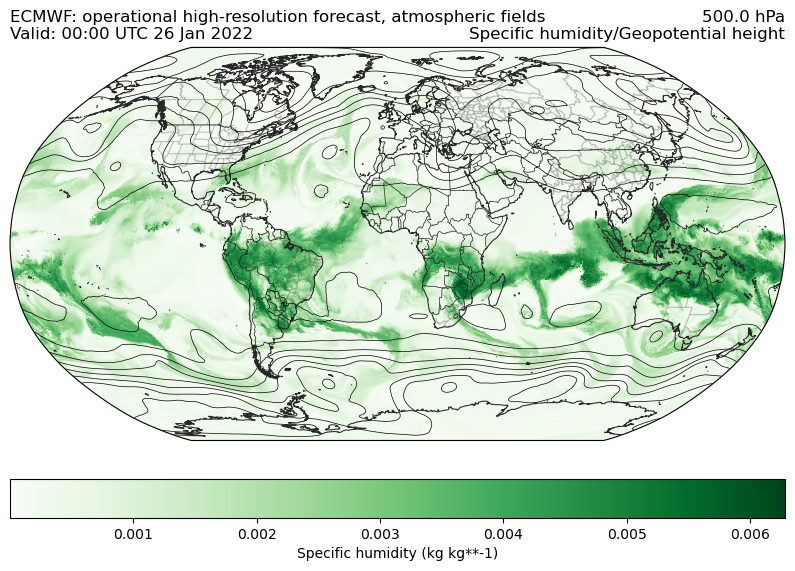

In [11]:
ax = EasyMap("50m", crs=ccrs.Robinson(), figsize=[10, 10]).STATES().BORDERS().ax

# Color shade by specific humidity
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.q, transform=pc, cmap="Greens")

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    label=f"{ds.q.GRIB_name} ({ds.q.units})",
)

# Contours for geopotential height
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    transform=pc,
    colors="k",
    linewidths=0.5,
    levels=range(0, 10_000, 60 * 2),
)


ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(
    f"{ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}\n{ds.q.GRIB_name}/{ds.gh.GRIB_name}",
    loc="right",
)

## ECMWF Wave Output

In [12]:
H = Herbie("2022-01-26 00:00", model="ecmwf", product="wave")

✅ Found ┊ model=ecmwf ┊ product=wave ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


In [13]:
ds = H.xarray(None, verbose=True)
ds

✅ Success! Downloaded ECMWF from azure               
	src: C:\Users\blaylock\data\ecmwf\20220126\20220126000000-0h-wave-fc.grib2
	dst: C:\Users\blaylock\data\ecmwf\20220126\20220126000000-0h-wave-fc.grib2


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    meanSea              float64 0.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    mp2                  (latitude, longitude) float32 nan nan nan ... nan nan
    swh                  (latitude, longitude) float32 nan nan nan ... nan nan
    mwd                  (latitude, longitude) float32 nan nan nan ... nan nan
    pp1d                 (latitude, longitude) float32 nan nan nan ... nan nan
    mwp                  (latitude, longitude) float32 nan nan nan ... nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 wave
    description:             ECMWF open data
    remote_grib:             C:\Users\blaylock\data\ecmwf\20220126\2022012600...
    local_grib:              C:\Users\blaylock\data\ecmwf\20220126\2022012600...
    searchString:            None

Text(1.0, 1.0, 'Significant height of combined wind waves and swell')

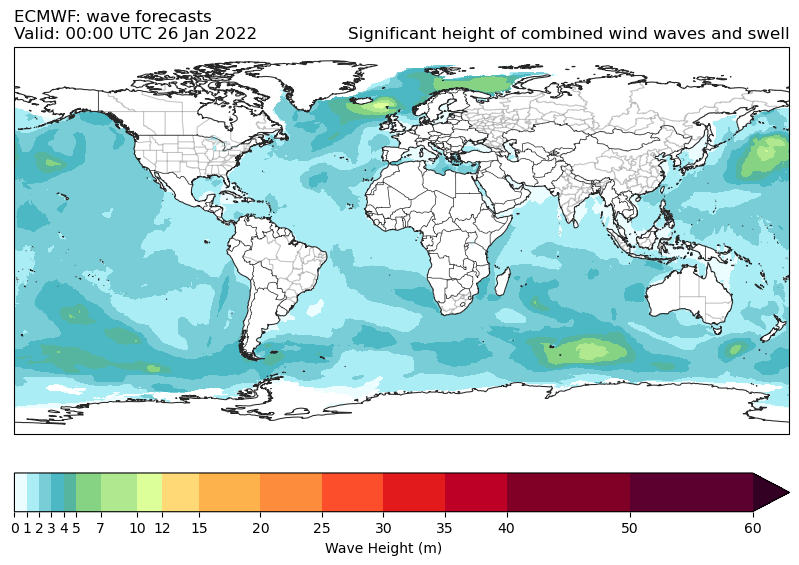

In [14]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.swh,
    transform=pc,
    **cm_wave_height(units="m").cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    **cm_wave_height(units="m").cbar_kwargs,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.swh.GRIB_name, loc="right")

## Ensemble Forecast Products

In [ ]:
H = Herbie("2022-01-26 00:00", model="ecmwf", product="enfo")
ds = H.xarray(":2t:")
ds

In [ ]:
# Dataset with all 50 members
ds[0]

In [ ]:
# This Dataset is of the mean of all the members, right?
ds[1]

In [ ]:
H.idx

## Ensemble Wave Products

In [ ]:
H = Herbie("2022-01-26 00:00", model="ecmwf", product="waef")
ds = H.xarray(None)
ds

In [ ]:
len(ds)

In [ ]:
ds[0]

In [ ]:
ds[1]

In [ ]:
H = Herbie("2022-01-26", model="ecmwf", product="enfo")
H.read_idx()

Here is another examle, just for fun

In [ ]:
H = Herbie("2022-01-26", model="ecmwf", product="oper", fxx=12)

In [ ]:
# Download the full grib2 file
H.download()

In [ ]:
# Download just the 10-m u and v winds
H.download(searchString=":10(u|v):")

In [ ]:
# Retrieve the 500 hPa temperature as an xarray.Dataset
ds = H.xarray(searchString=":t:500:")

In [ ]:
ds

In [ ]:
ds.t.plot()

----

**[Attribution](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time#ECMWFOpenDataRealTime-Attribution)**

- Copyright statement: Copyright "© 2022 European Centre for Medium-Range Weather Forecasts (ECMWF)".
- Source www.ecmwf.int
- Licence Statement: This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/
- Disclaimer: ECMWF does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use.
